In [1]:
#%
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import glob
import os
import cartopy.crs as ccrs

In [2]:
fol='/home/vanoorschot/work/fransje/scripts/GLOBAL_SR/'
df = pd.read_csv(f'{fol}/p_q_ep_timeseries_selected_catchments/mean_q_p_ep.csv', index_col=0)
# df = df.dropna()
ep = df.ep
q = df.q
p = df.p
l = len(df)

Text(0.5, 1.0, 'Budyko framework 8658 catchments')

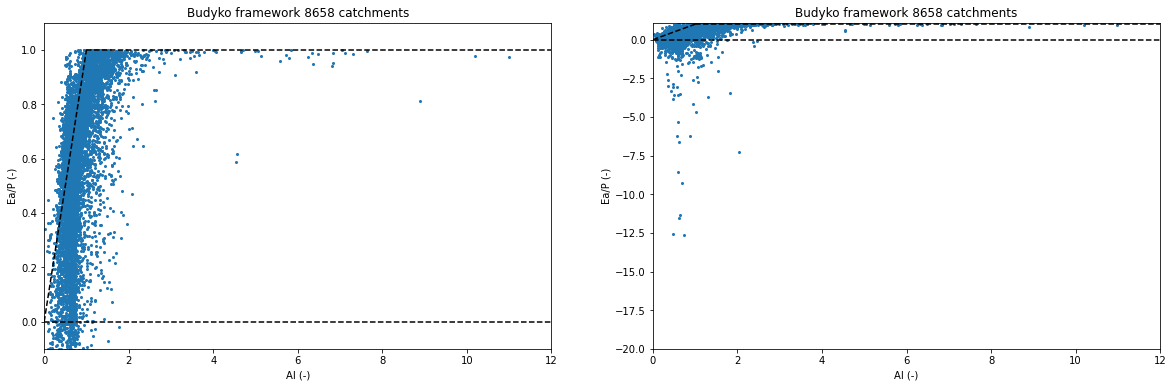

In [3]:
# plot catchments in budyko framework
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
ax.plot(ep/p, (p-q)/p, 'o', markersize=2)
ax.plot([0,1],[0,1], '--k')
ax.plot([1,12],[1,1], '--k')
ax.plot([0,12],[0,0], '--k')
ax.set_xlabel('AI (-)')
ax.set_ylabel('Ea/P (-)')
ax.set_xlim(0,12)
ax.set_ylim(-0.1,1.1)
ax.set_title(f'Budyko framework {l} catchments')

ax = fig.add_subplot(122)
ax.plot(ep/p, (p-q)/p, 'o', markersize=2)
ax.plot([0,1],[0,1], '--k')
ax.plot([1,12],[1,1], '--k')
ax.plot([0,12],[0,0], '--k')
ax.set_xlabel('AI (-)')
ax.set_ylabel('Ea/P (-)')
ax.set_xlim(0,12)
ax.set_ylim(-20,1.1)
ax.set_title(f'Budyko framework {l} catchments')

Text(0.5, 1.0, 'P>Q and Ep>Ea 5847/8658 catchments')

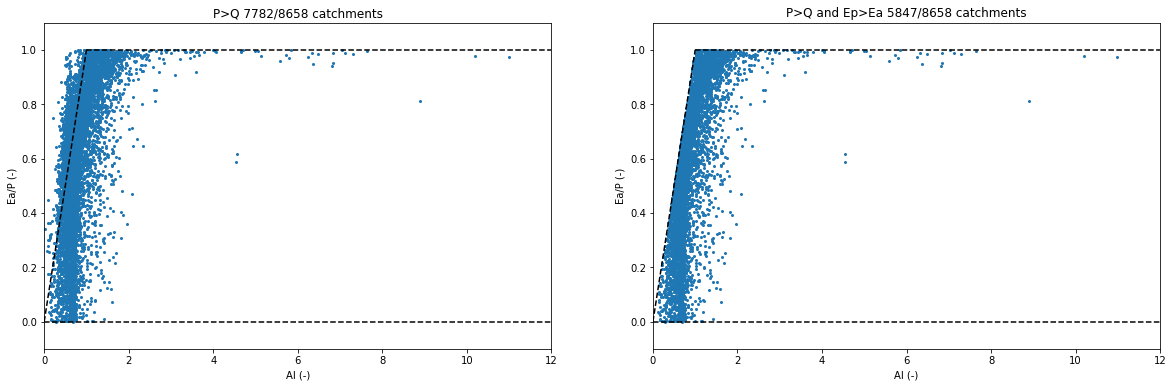

In [4]:
# plot catchments with water balance constraint in budyko framework

# P > Q
df_wb1 = df[df.p>df.q]
l1 = len(df_wb1)
ep, q, p = df_wb1.ep, df_wb1.q, df_wb1.p

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
ax.plot(ep/p, (p-q)/p, 'o', markersize=2)
ax.plot([0,1],[0,1], '--k')
ax.plot([1,12],[1,1], '--k')
ax.plot([0,12],[0,0], '--k')
ax.set_xlabel('AI (-)')
ax.set_ylabel('Ea/P (-)')
ax.set_xlim(0,12)
ax.set_ylim(-0.1,1.1)
ax.set_title(f'P>Q {l1}/{l} catchments')


# P > Q AND Ep > Ea
df_wb1 = df[df.p>df.q]
df_wb2 = df_wb1[(df_wb1.p-df_wb1.q) < df_wb1.ep]
l2 = len(df_wb2)
ep, q, p = df_wb2.ep, df_wb2.q, df_wb2.p

ax = fig.add_subplot(122)
ax.plot(ep/p, (p-q)/p, 'o', markersize=2)
ax.plot([0,1],[0,1], '--k')
ax.plot([1,12],[1,1], '--k')
ax.plot([0,12],[0,0], '--k')
ax.set_xlabel('AI (-)')
ax.set_ylabel('Ea/P (-)')
ax.set_xlim(0,12)
ax.set_ylim(-0.1,1.1)
ax.set_title(f'P>Q and Ep>Ea {l2}/{l} catchments')

In [5]:
# MAPS
fol='/home/vanoorschot/work/fransje/scripts/GLOBAL_SR/'
sh = gpd.read_file(f'{fol}/shapes/merged_gpd_selected_catchments_aus.shp')
sh.index = sh.CatchID
df = pd.read_csv(f'{fol}/p_q_ep_timeseries_selected_catchments/mean_q_p_ep.csv', index_col=0)
sh1 = sh.loc[df_wb1.index]
sh2 = sh.loc[df_wb2.index]

Text(0.5, 1.0, 'all catchments: #8658')

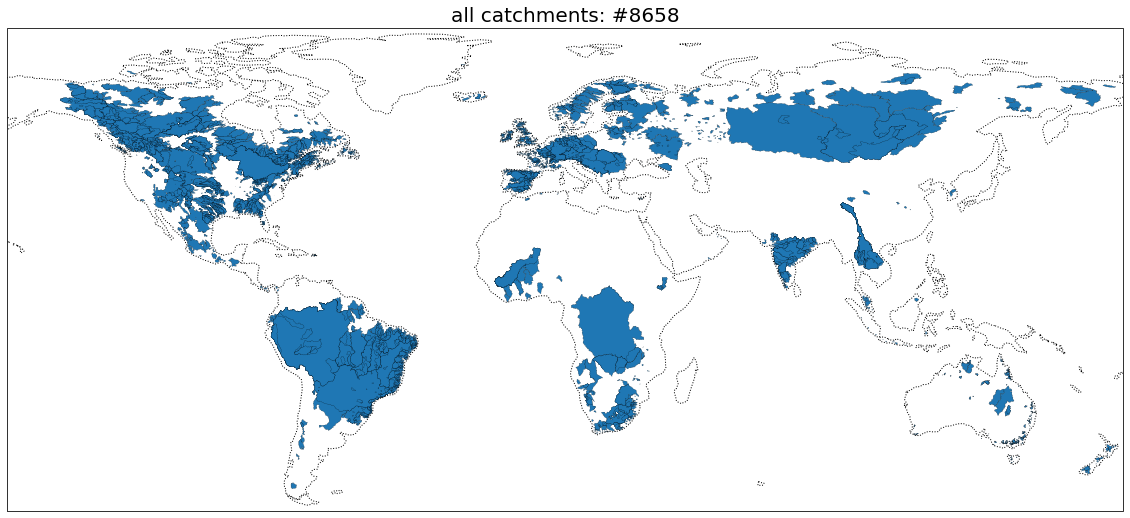

In [6]:
#plot all catchments
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linestyle=':')
sh.plot(edgecolor='black',linewidth=0.15,ax=ax)
ax.set_title(f'all catchments: #{len(sh)}',size=20)

Text(0.5, 1.0, 'catchments red if q>p: #7782/8658')

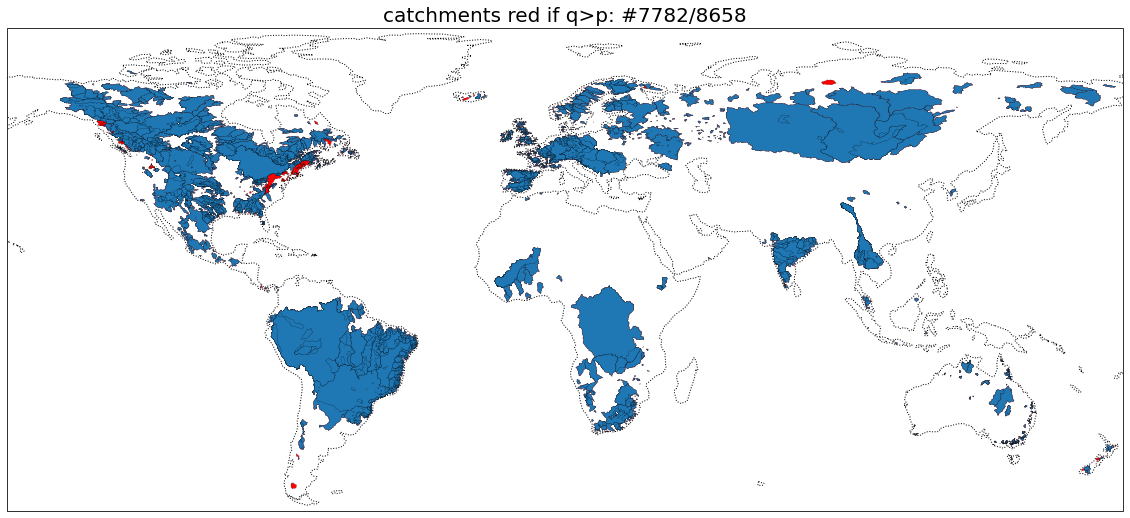

In [7]:
# catchments with incorrect P>Q
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linestyle=':')
sh.plot(edgecolor='black',facecolor='red',linewidth=0.15,ax=ax)
sh1.plot(edgecolor='black',linewidth=0.15,ax=ax)
ax.set_title(f'catchments red if q>p: #{len(sh1)}/{len(sh)}',size=20)


Text(0.5, 1.0, 'catchments pink if ea=p-q > ep AND q>p: #5847/8658')

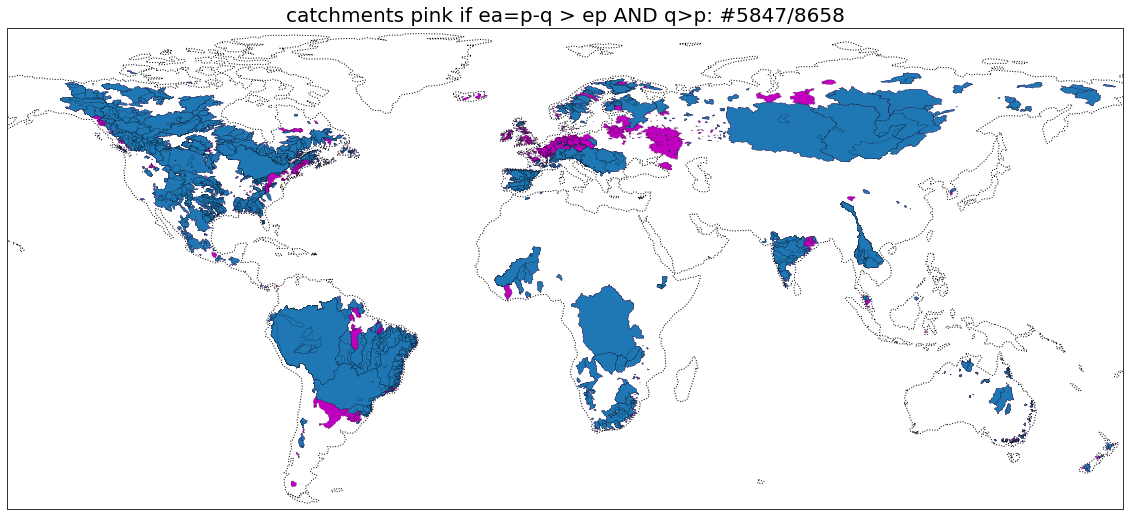

In [8]:
# catchments with incorrect EA>EP
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linestyle=':')
sh.plot(edgecolor='black',facecolor='m',linewidth=0.15,ax=ax)
sh2.plot(edgecolor='black',linewidth=0.15,ax=ax)
ax.set_title(f'catchments pink if ea=p-q > ep AND q>p: #{len(sh2)}/{len(sh)}',size=20)

In [9]:
# save list of catchments without q>p catchments
l = df_wb1.index.values
np.savetxt(f'{fol}/catch_id_selected_lowercase_wb.txt',l,fmt='%s')